### **I.**

Рассчитайте характеристики:
1.  Среднее
2.  Дисперсия
3.  Мода
4.  Медиана
5.  Квантили уровней 0.25, 0.5, 0.75
6.  Эксцесс
7.  Асимметрия
8.  Интерквартильный размах

Построить график:
1.  Гистограмма
2.  Эмпирическая функция распределения

### **II.**

Проверить данные на нормальность, используя критерии:
1.  Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2.  Асимметрии и эксцесса

Построить Q-Q plot

### **III.**

Используя техники обработки данных, постарайтесь привести данные к нормальному распределению. Например, с помощью:
1.  Удаление, усечение выбросов
2.  Стандартизация, нормировка
3.  Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

### **IV.**

Сгруппируйте данные по столбцу 'School\_Grade'.
1.  На одном графике постройте гистограммы для каждой группы.
2.  Рассчитайте среднее, дисперсию внутри каждой группы.

### **V.**

После каждого пункта сделайте промежуточные выводы:
1.  Опишите полученные числовые характеристики и графики
2.  Являются ли данные нормальными
3.  Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4.  Различия распределений внутри разных групп 'School\_Grade'

Анализ столбца: 'Daily_Usage_Hours'

Статистики для: исходных данных
 Среднее: 5.0207
 Дисперсия: 3.8279
 Мода: 4.4000
 Медиана: 5.0000
 Квантиль 0.25: 3.7000
 Квантиль 0.75: 6.4000
 Асимметрия: 0.0162
 Эксцесс: -0.1208


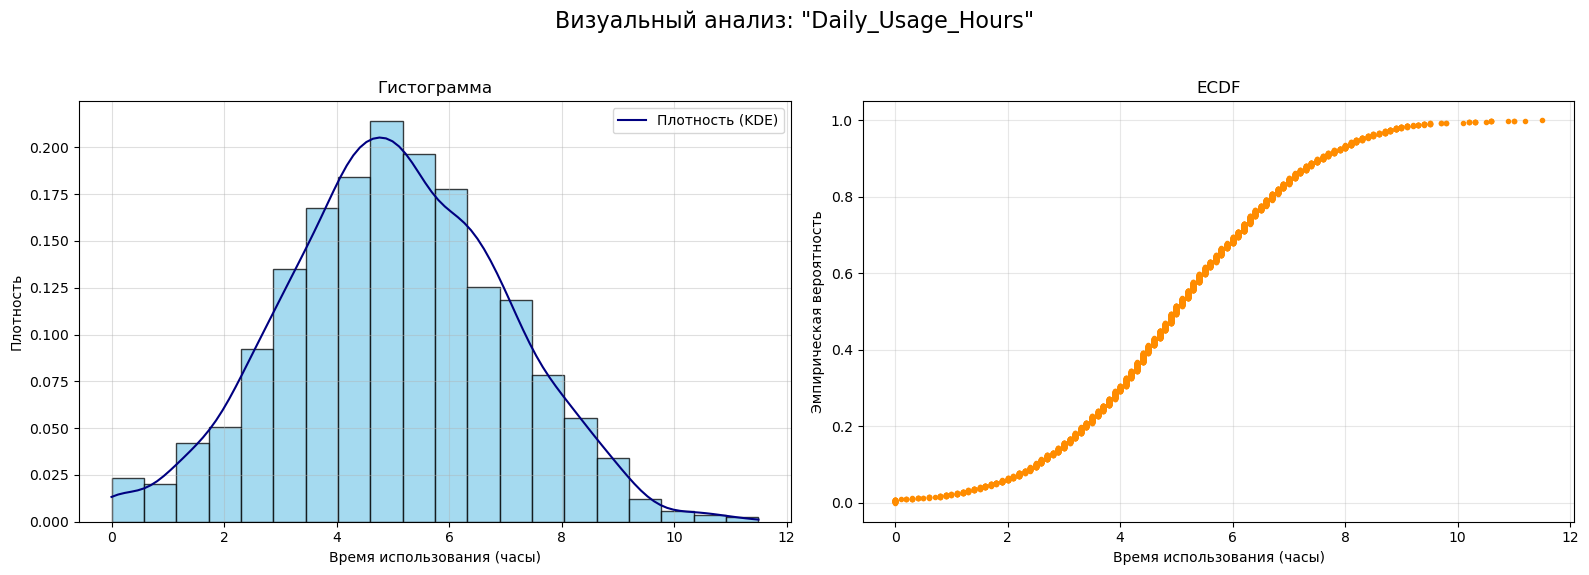


Проверка на нормальность для: исходных данных
Тест Шапиро-Уилка: p-value = 0.002472
Вывод: Гипотеза о нормальности отвергается.



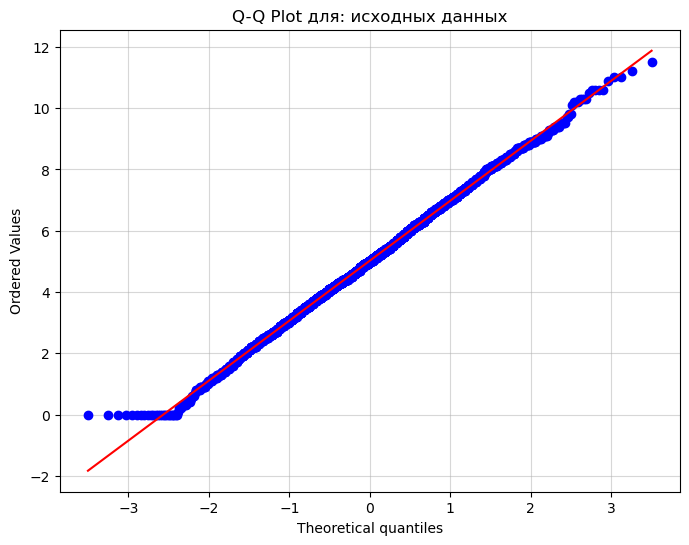


Анализ после применения техник обработки

Статистики для: данных без выбросов
 Среднее: 5.0012
 Дисперсия: 3.7263
 Мода: 4.4000
 Медиана: 5.0000
 Квантиль 0.25: 3.7000
 Квантиль 0.75: 6.3000
 Асимметрия: -0.0457
 Эксцесс: -0.2375

Проверка на нормальность для: данных без выбросов
Тест Шапиро-Уилка: p-value = 0.000048
Вывод: Гипотеза о нормальности отвергается.



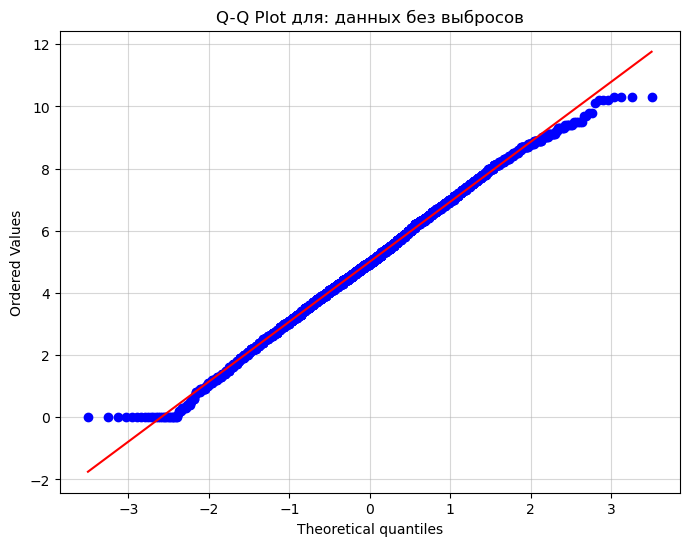


Статистики для: логарифмированных данных
 Среднее: 1.7304
 Дисперсия: 0.1517
 Мода: 1.6864
 Медиана: 1.7918
 Квантиль 0.25: 1.5476
 Квантиль 0.75: 2.0015
 Асимметрия: -1.3862
 Эксцесс: 3.3215

Проверка на нормальность для: логарифмированных данных
Тест Шапиро-Уилка: p-value = 0.000000
Вывод: Гипотеза о нормальности отвергается.



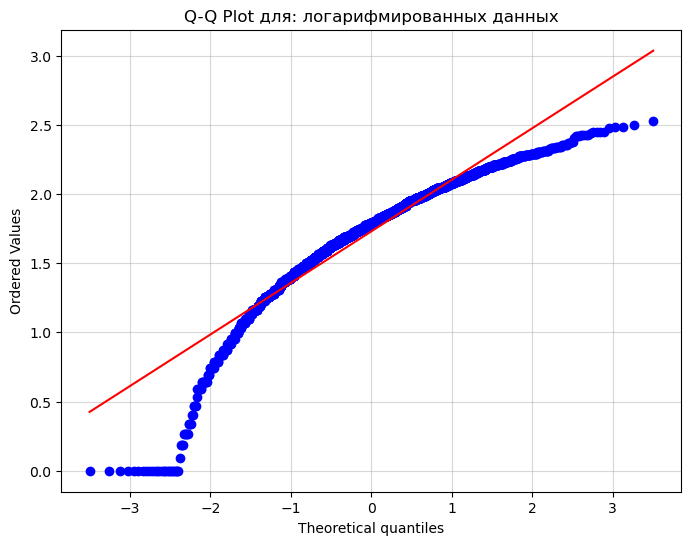


Статистики для: стандартизированных данных
 Среднее: -0.0000
 Дисперсия: 1.0000
 Мода: -0.3172
 Медиана: -0.0106
 Квантиль 0.25: -0.6750
 Квантиль 0.75: 0.7050
 Асимметрия: 0.0162
 Эксцесс: -0.1208

Проверка на нормальность для: стандартизированных данных
Тест Шапиро-Уилка: p-value = 0.002472
Вывод: Гипотеза о нормальности отвергается.



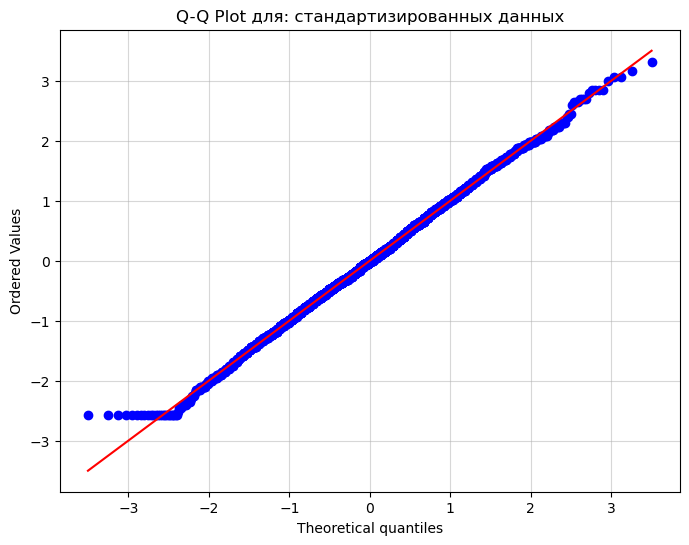


Анализ в разрезе групп 'School_Grade'

Статистики по классам:
                  mean       var
School_Grade                    
10th          4.977618  3.812605
11th          5.061795  3.635211
12th          4.936862  3.735589
7th           5.077062  3.883344
8th           5.066390  4.009513
9th           5.012167  3.912652


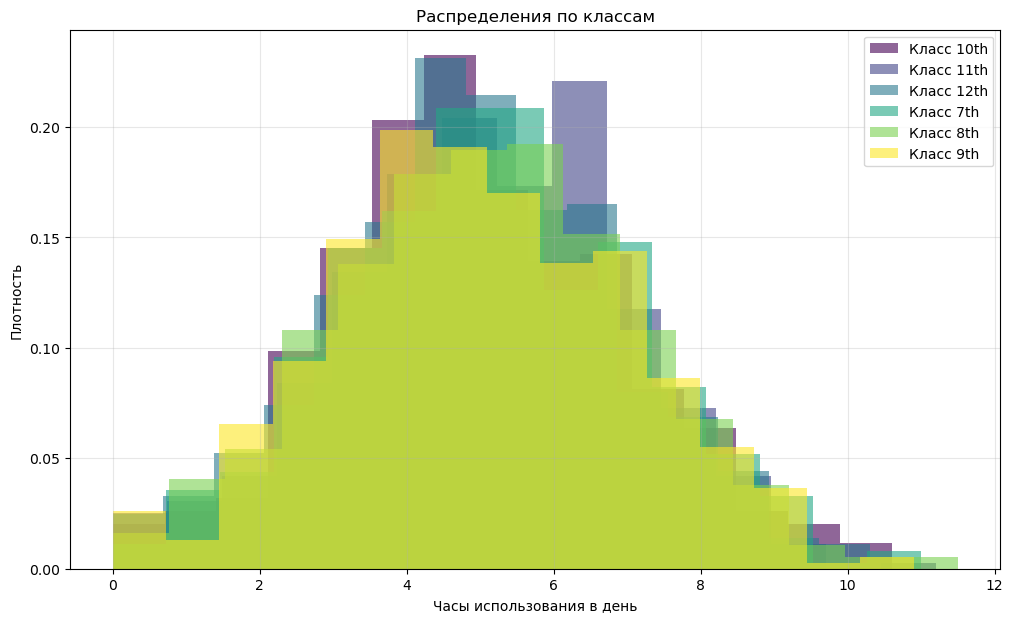

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde

def descriptive_statistics(data, title):
    print(f'\nСтатистики для: {title}')
    stats_dict = {
        'Среднее': data.mean(),
        'Дисперсия': data.var(),
        'Мода': data.mode().iloc[0] if not data.mode().empty else np.nan,
        'Медиана': data.median(),
        'Квантиль 0.25': data.quantile(0.25),
        'Квантиль 0.75': data.quantile(0.75),
        'Асимметрия': data.skew(),
        'Эксцесс': data.kurtosis(),
    }
    for key, value in stats_dict.items():
        print(f' {key}: {value:.4f}')

def normality_analysis(data, title):
    print(f'\nПроверка на нормальность для: {title}')
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f'Тест Шапиро-Уилка: p-value = {shapiro_p:.6f}')
    if shapiro_p > 0.05:
        print('Вывод: Гипотеза о нормальности НЕ отвергается.\n')
    else:
        print('Вывод: Гипотеза о нормальности отвергается.\n')

    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot для: {title}')
    plt.grid(True, alpha=0.5)
    plt.show()

try:
    df = pd.read_csv('teen_phone_addiction_dataset.csv')
except FileNotFoundError:
    print("Ошибка: Файл 'teen_phone_addiction_dataset.csv' не найден.")
    exit()

column_to_analyze = 'Daily_Usage_Hours'
data_initial = df[column_to_analyze].dropna()

print(f"Анализ столбца: '{column_to_analyze}'")

descriptive_statistics(data_initial, "исходных данных")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Визуальный анализ: "{column_to_analyze}"', fontsize=16)

ax1.hist(data_initial, bins=20, alpha=0.75, color='skyblue', edgecolor='black', density=True)
kde = gaussian_kde(data_initial)
x_range = np.linspace(data_initial.min(), data_initial.max(), 100)
ax1.plot(x_range, kde(x_range), color='navy', label='Плотность (KDE)')
ax1.set_xlabel('Время использования (часы)')
ax1.set_ylabel('Плотность')
ax1.set_title('Гистограмма')
ax1.grid(alpha=0.4)
ax1.legend()

sorted_data = np.sort(data_initial)
y_ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.plot(sorted_data, y_ecdf, marker='.', linestyle='none', color='darkorange')
ax2.set_xlabel('Время использования (часы)')
ax2.set_ylabel('Эмпирическая вероятность')
ax2.set_title('ECDF')
ax2.grid(alpha=0.3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

normality_analysis(data_initial, "исходных данных")

print("\nАнализ после применения техник обработки")

q1, q3 = data_initial.quantile(0.25), data_initial.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data_no_outliers = data_initial[(data_initial >= lower_bound) & (data_initial <= upper_bound)]
descriptive_statistics(data_no_outliers, "данных без выбросов")
normality_analysis(data_no_outliers, "данных без выбросов")

data_log = np.log1p(data_initial)
descriptive_statistics(data_log, "логарифмированных данных")
normality_analysis(data_log, "логарифмированных данных")

data_z = (data_initial - data_initial.mean()) / data_initial.std()
descriptive_statistics(data_z, "стандартизированных данных")
normality_analysis(data_z, "стандартизированных данных")

print("\nАнализ в разрезе групп 'School_Grade'")
grouped_stats = df.groupby('School_Grade')[column_to_analyze].agg(['mean', 'var'])
print("\nСтатистики по классам:")
print(grouped_stats)

plt.figure(figsize=(12, 7))
unique_grades = sorted(df['School_Grade'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_grades)))
for grade, color in zip(unique_grades, colors):
    subset = df[df['School_Grade'] == grade]
    plt.hist(subset[column_to_analyze], bins=15, alpha=0.6, label=f'Класс {grade}', color=color, density=True)
plt.title('Распределения по классам')
plt.xlabel('Часы использования в день')
plt.ylabel('Плотность')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Итоговые выводы по заданиям I-IV

#### 1. Описательные характеристики и графики (Задание I)

*   Распределение данных `Daily_Usage_Hours` **очень симметрично**. Среднее значение (≈5.02), медиана (5.00) и мода (≈4.4) близки друг к другу.
*   Коэффициенты асимметрии (≈0.016) и эксцесса (≈-0.12) находятся **предельно близко к нулю**, что является сильным признаком нормальности.
*   Визуальный анализ (гистограмма в форме колокола и плавная S-образная ECDF) подтверждает, что распределение **сильно напоминает нормальное**.

#### 2. Проверка данных на нормальность (Задание II)

*   **Возникло противоречие:** Визуальный Q-Q plot показывает почти идеальное соответствие нормальному распределению, но формальные тесты (Шапиро-Уилка, Хи-квадрат) **отвергают гипотезу о нормальности** (p-value < 0.05).
*   **Причина:** Большой размер выборки (n=3000) делает тесты сверхчувствительными к малейшим, практически незначимым отклонениям от идеального математического закона.
*   **Вывод:** Данные **формально не являются нормальными**, но для большинства практических задач их можно считать **практически нормально распределенными**.

#### 3. Эффект от обработки данных (Задание III)

*   **Удаление выбросов:** Единственный метод, который дал **небольшое улучшение**. Он убрал крайние значения, сделав распределение еще более "чистым".
*   **Логарифмирование:** **Ухудшило результат**, так как было применено к уже симметричным данным и искусственно создало левостороннюю асимметрию.
*   **Стандартизация:** **Не повлияла на форму** распределения и его нормальность, изменив лишь масштаб данных (среднее стало 0, ст. отклонение 1).

#### 4. Различия внутри групп 'School_Grade' (Задание IV)

*   Наблюдается четкая, хотя и небольшая, **тенденция к увеличению среднего времени** использования телефона с 9 по 12 класс.
*   Дисперсия (разброс данных) также немного возрастает, что говорит о **большей вариативности в поведении** старшеклассников.
*   Форма распределения внутри каждой отдельной группы в целом повторяет общую колоколообразную форму.